# load csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./layer8/processed.csv')
x_pos = np.array(df['x_pos'][:])
y_pos = np.array(df['y_pos'][:])

In [3]:
df.keys()

Index(['area_1kh', 'mu_1kh', 'area_2kh', 'mu_2kh', 'T_kh', 'E_kh', 'T_0',
       'E_0', 'threshold_10', 'mu_10', 'std_10', 'max_10', 'min_10',
       'area_thr_10', 'area_10', 'threshold_20', 'mu_20', 'std_20', 'max_20',
       'min_20', 'area_thr_20', 'area_20', 'T_1', 'E_1', 'threshold_11',
       'mu_11', 'std_11', 'max_11', 'min_11', 'area_thr_11', 'area_11',
       'threshold_21', 'mu_21', 'std_21', 'max_21', 'min_21', 'area_thr_21',
       'area_21', 'T_2', 'E_2', 'threshold_12', 'mu_12', 'std_12', 'max_12',
       'min_12', 'area_thr_12', 'area_12', 'threshold_22', 'mu_22', 'std_22',
       'max_22', 'min_22', 'area_thr_22', 'area_22', 'T_3', 'E_3',
       'threshold_13', 'mu_13', 'std_13', 'max_13', 'min_13', 'area_thr_13',
       'area_13', 'threshold_23', 'mu_23', 'std_23', 'max_23', 'min_23',
       'area_thr_23', 'area_23', 'frame', 'time', 'diode', 'x_pos', 'y_pos',
       'max_1', 'max_2', 'centroid_c1_r', 'centroid_c1_c', 'centroid_c2_r',
       'centroid_c2_c'],
      d

(0.0, 40.0)

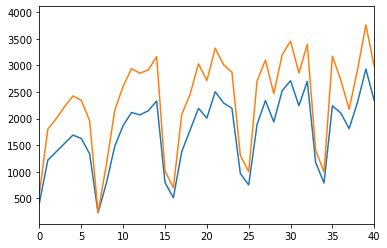

In [4]:
plt.plot(df.mu_10)
plt.plot(df.mu_20)
plt.xlim(0,40)

(array([4.5400e+02, 2.2013e+04, 1.8334e+04, 3.0390e+03, 2.6740e+03,
        1.8770e+03, 7.7200e+02, 1.6600e+02, 2.7000e+01, 4.0000e+00]),
 array([0.60442046, 0.70259881, 0.80077716, 0.89895551, 0.99713386,
        1.0953122 , 1.19349055, 1.2916689 , 1.38984725, 1.4880256 ,
        1.58620395]),
 <BarContainer object of 10 artists>)

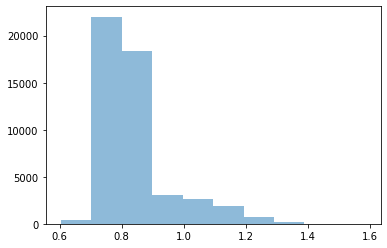

In [5]:
plt.hist(df.mu_10 / df.mu_20, alpha=0.5) #alpha is the transparency
# plt.hist(df.mu_20, alpha=0.5)

In [6]:
df.E_0.mean()

1.980624096991483

In [7]:
df.T_0.mean()

2501.5114003246017

In [8]:
df.E_0[df.E_0 < 1e5].mean()

1.980624096991483

(array([1.7000e+01, 9.0400e+02, 5.4150e+03, 1.6975e+04, 1.3568e+04,
        4.0960e+03, 1.5140e+03, 1.3990e+03, 1.3450e+03, 1.3020e+03,
        1.0450e+03, 7.9500e+02, 4.6600e+02, 3.0600e+02, 1.2800e+02,
        5.2000e+01, 2.1000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([2181.76881305, 2248.83030962, 2315.89180619, 2382.95330276,
        2450.01479933, 2517.0762959 , 2584.13779247, 2651.19928904,
        2718.26078561, 2785.32228218, 2852.38377875, 2919.44527532,
        2986.50677189, 3053.56826846, 3120.62976503, 3187.6912616 ,
        3254.75275817, 3321.81425474, 3388.87575131, 3455.93724788,
        3522.99874445]),
 <BarContainer object of 20 artists>)

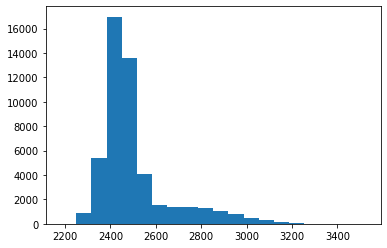

In [9]:
plt.hist(df.T_0, bins=20)

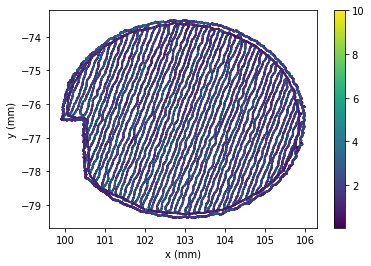

In [10]:
plt.scatter(df.x_pos[1:], df.y_pos[1:], c=df.E_0[1:], vmax=10, s=1)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar()

In [11]:
df[['x_pos', 'y_pos']]

x_pos      y_pos
0       97.797553 -73.305715
1      100.203477 -75.107056
2      100.211309 -75.109707
3      100.218030 -75.114616
4      100.224126 -75.118654
...           ...        ...
49395  105.907017 -77.161475
49396  105.907037 -77.156768
49397  105.910931 -77.152736
49398  105.914989 -77.152125
49399  105.911732 -77.150852

[49400 rows x 2 columns]

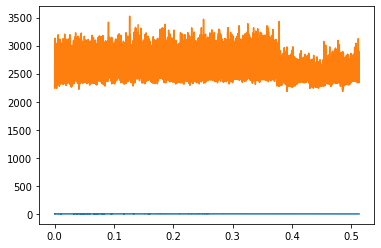

In [12]:
#Laser power = diode*200watts
plt.plot(df.time, df.diode)
plt.plot(df.time, df.T_0)

# load centroids

In [13]:
pth = './layer8/weighted_centroids_diode_aligned.npy'
d = np.load(pth, allow_pickle=True).item()

In [14]:
d.keys()

dict_keys(['laserdata', 'c1_c2_centroid', 'c1_c2_max', 'c1_c2_area', 'c1_bb_xywh', 'c2_bb_xywh', 'thresholds_c1_c2', 'filter_result', 'time', 'x_pos', 'y_pos', 'diode'])

In [15]:
d['c2_bb_xywh']

array([[128.5,  87.5,   3.5,   4.5],
       [126.5,  86.5,   6.5,   6.5],
       [126.5,  86. ,   6.5,   7. ],
       ...,
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan]])

In [16]:
centroid = d['c1_c2_centroid']
centroid = np.nan_to_num(centroid[:49400,:])
print(centroid[600,0])
print(centroid[600][0])

141.8915100021051
141.8915100021051


# Check for missing centroids

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
def weighted_centroid(img, cnt, x_m, y_m):
    """Calculate intensity weighted centroid"""
    bb = cv2.boundingRect(cnt)
    x,y,w,h = bb
    weights = img[y:y+h, x:x+w]

    cx = np.sum(weights * x_m[y:y+h,x:x+w]) / np.sum(weights) + 0.5
    cy = np.sum(weights * y_m[y:y+h,x:x+w]) / np.sum(weights) + 0.5

    return cx, cy, weights.max(), bb

def find_metrics(im_grey, im_thr):

    if im_thr.sum() == 0:
        return None
    else:
        contours, _ = cv2.findContours(im_thr, 
                                        cv2.RETR_TREE, 
                                        cv2.CHAIN_APPROX_SIMPLE)

        r,c = im_grey.shape
        x_m, y_m = np.meshgrid(np.linspace(0,c-1,c), np.linspace(0,r-1,r))
        metrics = []
        for c in contours:
            
            area = cv2.contourArea(c)

            cx, cy, max_grey, bb = weighted_centroid(im_grey, c, x_m, y_m)

            metrics.append([cx, cy, max_grey, area])

        return metrics

In [17]:
import h5py

pth = './layer8/rawdataALLFRAMES.mat'

[1]


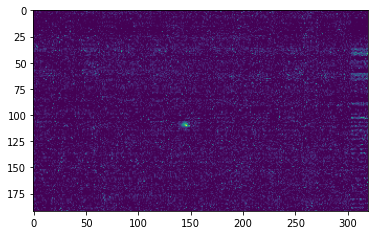

In [15]:
res = []
x_centre = 160
y_centre = 98
radius = 19

index = 198
for idx in range(10, 11):
    with h5py.File(pth, 'r') as h:
        #print(h.keys())
        c1 = h['cam1'][idx][:] #camera 1
        c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
        
    if np.all(centroid[idx]) == False:
        # get the threshold image
        threshold = 60
        _, img_thr = cv2.threshold(c1, threshold, 1,0)
        img_thr  = img_thr.astype(np.uint8)

        # find the image centroids
        metrics = find_metrics(c1, img_thr)
#         print(metrics)
#         for metric in metrics:
#             plt.plot(metric[0], metric[1], 'rx')
        # plot the centroids
        if metrics != None:
            metrics = [i for i in metrics if np.sqrt((i[0]-x_centre)**2 + (i[1]-y_centre)**2) <= radius]
            res.append(len(metrics))
        else:
            res.append(0)
                
print(res)
# plt.plot(res[0][0], res[0][1], 'rx')

#plot the image
# fig, ax = plt.subplots()
# circle=plt.Circle((160,98),19, color='r')
# ax.add_patch(circle)
plt.imshow(c1)
plt.show()
        
        

# Load single image and plot centroid

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import hdf5storage
import cv2
from pprint import pprint
from scipy.io import loadmat
from scipy.io import savemat
plt.style.use('classic')
from scipy import ndimage

In [3]:
pth = './layer8/rawdataALLFRAMES.mat'

#this is just for element 1000 for now
idx = 3075

with h5py.File(pth, 'r') as h:
    print(h.keys())
    c1 = h['cam1'][idx][:] #camera 1
    c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
#     im = h['end_frame'][:]
    im = h['imagedata'][:]
print(im.shape)

<KeysViewHDF5 ['#refs#', 'cam1', 'cam2', 'end_frame', 'imagedata', 'laserdata']>


AttributeError: 'slice' object has no attribute 'encode'

ValueError: s must be a scalar, or float array-like with the same size as x and y

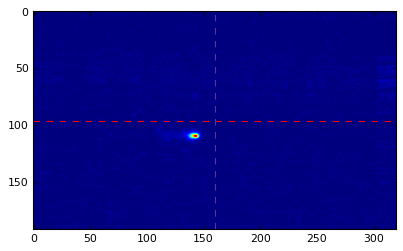

In [36]:
f, ax = plt.subplots(1)
plt.rcParams['figure.dpi'] = 78
f.patch.set_facecolor('white')
ax.imshow(c1)
ax.axhline(y=96, color='r', linestyle='--')
ax.axvline(x=160, color='r', linestyle='--')
ax.plot(d['c1_c2_centroid'][idx, 0], d['c1_c2_centroid'][idx, 1], 'rx', linewidth=1, ms=10)
ax.set_xlim(0,320)
ax.set_ylim(191,0)
# circle1 = plt.Circle((160, 96), 7, color='r')
# ax.add_patch(circle1)
#ax[1].imshow(c2)
#plt.imsave('frame500_c1.png', c1)

# Code to determine the size of the melt pool

In [35]:
import cv2

# Read image
im = cv2.imread("frame500_c1.png", cv2.IMREAD_GRAYSCALE)
# Invert the image from black to white and vice versa
im = cv2.bitwise_not(im)

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [36]:
for keyPoint in keypoints:
    s = keyPoint.size

print(s)
#convert pixels to mm
m = s*20*10**(-3)
print('Melt pool in mm:', m)

t = m/620
print('Time:', t)

f = 100000*t
print('Frames:', f)

NameError: name 's' is not defined

# Transformation for loop

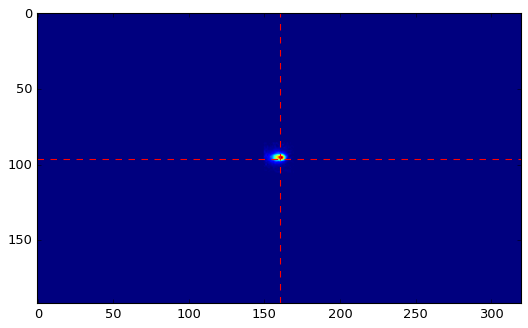

In [50]:
#Mark the center of the image
center_x = 160
center_y = 96

#Calculate discrepency between center of image and laser point
def delta(center_x, center_y, idx):
    delta_x1 = center_x - round(centroid[idx, 0])
    delta_y1 = center_y - round(centroid[idx, 1])
    delta_x2 = center_x - round(centroid[idx, 2])
    delta_y2 = center_y - round(centroid[idx, 3])
    return delta_x1, delta_y1, delta_x2, delta_y2

def transform(delta_x, delta_y, img):
    
    #translate vertical
    if delta_y == 0:
        img_new = img.copy()
    else:
        '''
        if delta_y > 0: #translate up
            delta_y = -delta_y
        '''
        temp = img[:-delta_y]
        img_new = img.copy()
        img_new[:delta_y] = img[-delta_y:]
        img_new[delta_y:] = temp
    
    #translate horizontal
    if delta_x == 0:
        img_new = img_new.copy()
    else:
        '''
        if delta_x > 0: 
            delta_x = -delta_x
            '''
        temp = img_new[:,-delta_x:]
        img_new[:,delta_x:] = img_new[:,:-delta_x]
        img_new[:,:delta_x] = temp
    
    return img_new

#Align images, calculate intensity ratio and save to .mat file
intensity_array = []
f, ax = plt.subplots()
f.patch.set_facecolor('white')


for idx in range(3075, 3076):
    with h5py.File(pth, 'r') as h:
        #print(h.keys())
        c1 = h['cam1'][idx][:] #camera 1
        c2 = np.fliplr(h['cam2'][idx][:]) #camera 2
    
    #Check if the image pixels are correct
    if c1.shape and c2.shape != (192, 320):
        continue
    
    #Check if there are values for the laser position
    if np.all(centroid[idx]) == False:
        continue
        
    delta_x1, delta_y1, delta_x2, delta_y2 = delta(center_x, center_y, idx)
    img_new1 = transform(delta_x1, delta_y1, c1)
    img_new2 = transform(delta_x2, delta_y2, c2)
    
    img_new1[:86,:] = 0
    img_new1[106:,:] = 0
    img_new1[:,:150] = 0
    img_new1[:,170:] = 0
    
    ax.imshow(img_new1)
#     ax[0].set_title('(a) Raw image')
#     print(img_new1.shape)
    
#     ax[1].imshow(img_new2)
#     plt.imsave('./Figures/3075_c2.png', img_new2)
    
#     plt.rcParams['figure.dpi'] = 78
#     img_new1 = ndimage.rotate(img_new1, -110, reshape=False)
#     ax.imshow(img_new1)
#     ax[1].set_title('(b) Melt pool rotated by -110 degrees')
#     print(img_new1.shape)
#     plt.imsave('3075.png', img_new1)
    ax.axhline(y=96, color='r', linestyle='--')
    ax.axvline(x=160, color='r', linestyle='--')
    #ax[0,1].imshow(img_new2)

# circle1 = plt.Circle((160, 96), 2, color='r')
# ax.add_patch(circle1)



# load multiple images without using too much memory

In [41]:
# load images
idx_0 = 1000
idx_1 = idx_0 + 100

h = h5py.File(pth, 'r')
c1 = h['cam1'][idx_0:idx_1][:]
c2 = np.flip(h['cam2'][idx_0:idx_1][:], axis=2)


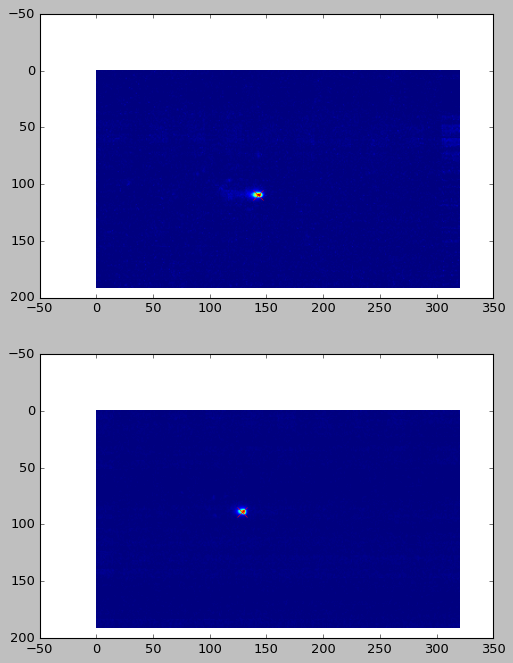

In [46]:
# do some stuff
f, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].imshow(c1[0])
ax[1].imshow(c2[0])

ax[0].plot(d['c1_c2_centroid'][idx_0, 0], d['c1_c2_centroid'][idx_0, 1], 'rx', ms=10)
ax[1].plot(d['c1_c2_centroid'][idx_0, 2], d['c1_c2_centroid'][idx_0, 3], 'rx', ms=10)

In [44]:
# close file
h.close()

# Cooling Rates

In [1]:
import pandas as pd
import h5py
import numpy as np
import hdf5storage
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import scipy.stats as st
import statsmodels.api as sm
import scipy

In [2]:
#Load and read files
df = pd.read_csv('C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/layer8/processed.csv')
x_pos = np.array(df['x_pos'][:])
y_pos = np.array(df['y_pos'][:])
power = np.array(df['diode'][:])
E_0 = np.array(df['E_0'][:])

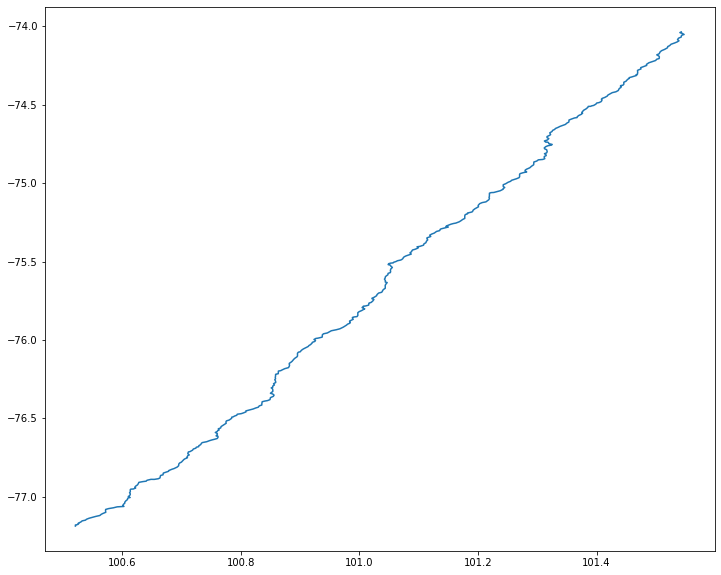

In [5]:
plt.subplots(figsize=(12,10))
plt.plot(x_pos[1:36450], y_pos[1:36450])

plt.xlim(99,107)
plt.ylim(-80, -73)
plt.axis('off')
plt.savefig('buildplate_plot.png', bbox_inches='tight')

Text(0, 0.5, 'y (mm)')

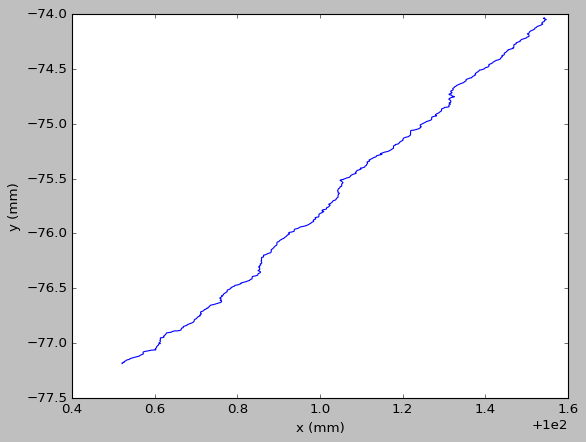

In [39]:
# plt.rcParams['figure.dpi'] = 300
plt.plot(x_pos[2885:3397], y_pos[2885:3397])
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# Cooling Rate Map

In [18]:
#Read cooling rate .mat file
f = 'C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/Cooling Rates.mat'

In [19]:
cr = []
with h5py.File(f, 'r') as h:
    for i in list(h.keys())[0:len(x_pos)]:
        val = h[i][:]
        cr.append(val)
        
cr = np.array(cr)
cr = np.reshape(cr, [len(x_pos),])
x = np.linspace(0,len(x_pos),len(x_pos))
print(cr.shape)

(49400,)


In [21]:
#Cooling rate map
import matplotlib as mpl
import matplotlib.colors

cr_new = []
x = []
y = []
crAnomaly = []
xAnomaly = []
yAnomaly = []

for i in range(0, 36500):
    if cr[i] < -20 or cr[i] > 20:
        crAnomaly.append(cr[i])
        xAnomaly.append(x_pos[i])
        yAnomaly.append(y_pos[i])
    else:
        cr_new.append(cr[i])
        x.append(x_pos[i])
        y.append(y_pos[i])

cr_new = np.array(cr_new)

crPositive = []
xPositive = []
yPositive = []
powerOff = []
xPower = []
yPower = []

# for i in range(0,36500):
#     if cr[i] > 0:
#         crPositive.append(cr[i])
#         xPositive.append(x_pos[i])
#         yPositive.append(y_pos[i])
#     if power[i] < 0.8:
#         powerOff.append(power[i])
#         xPower.append(x_pos[i])
#         yPower.append(y_pos[i])

In [ ]:
# # cmap = (mpl.colors.ListedColormap(['blue', 'green', 'red', 'cyan', 'yellow'])
# #         .with_extremes(over='0.25', under='0.75'))
# colours = ['lavender', 'yellow', 'darkorange', 'orangered', 'lightgray', 'black']
# bins = [-20 , -5 , -3 , -1, 0, 20]

# assert len(bins) ==len(colours)
# cmap = mpl.colors.ListedColormap(colours)
# # bounds = [-20, -3, -2, 0, 5, 20]
# # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# norm = mpl.colors.BoundaryNorm(boundaries=bins, ncolors=len(cmap.colors)-1 )
# plt.scatter(x_pos[1:36500], y_pos[1:36500], c=cr_new[1:36500], cmap=cmap, norm=norm, s=10)
# plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm))
# plt.show()

Text(0, 0.5, 'Cooling Rates (K/mus)')

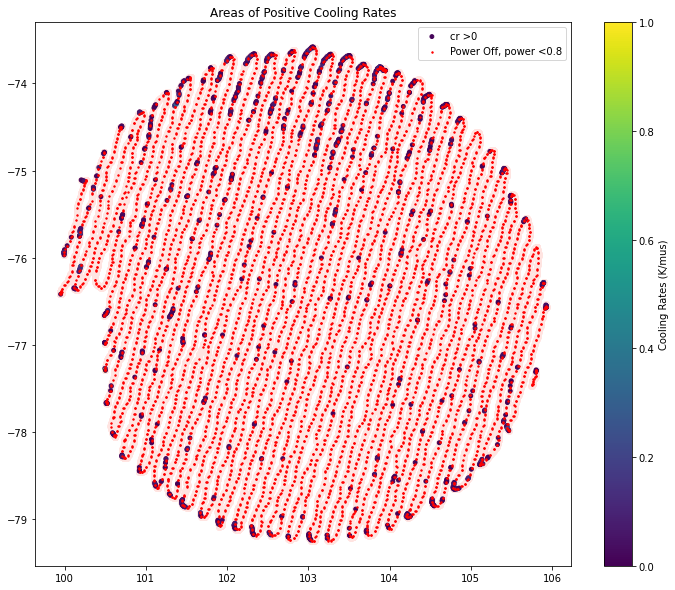

In [183]:
#Plot the anomalies <-20 and >20
fig, ax = plt.subplots(figsize=(12,10))

plt.scatter(x_pos[1:36500], y_pos[1:36500], c='mistyrose')
plt.scatter(xPositive[1:], yPositive[1:], c=crPositive[1:], s=15, label='cr >0')
plt.scatter(xPower[1:], yPower[1:], c='r', s=2, label='Power Off, power <0.8')
cbar = plt.colorbar()
plt.legend()
plt.title('Areas of Positive Cooling Rates')
cbar.ax.set_ylabel('Cooling Rates (K/mus)')

Text(0.5, 1.0, 'Cooling Rate Map - skipped cooling rates <-20 and >20 for clearer visualisation')

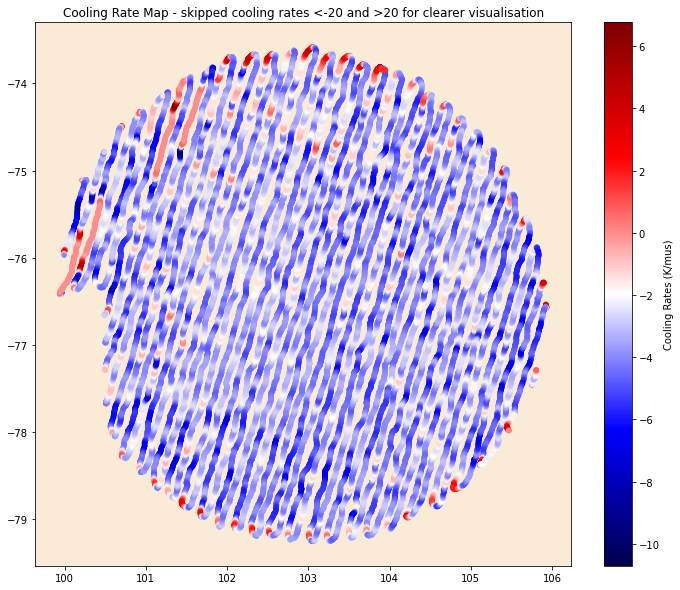

In [29]:
fig, ax = plt.subplots(figsize=(12,10))

from scipy.signal import savgol_filter
cr_new = savgol_filter(cr_new, 25, 2, mode='nearest')
plt.scatter(x[1:], y[1:], c=cr_new[1:], cmap='seismic', s=20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Cooling Rates (K/mus)')
ax.set_facecolor('antiquewhite')
plt.title('Cooling Rate Map - skipped cooling rates <-20 and >20 for clearer visualisation')

Text(0, 0.5, 'Normalised Power (W)')

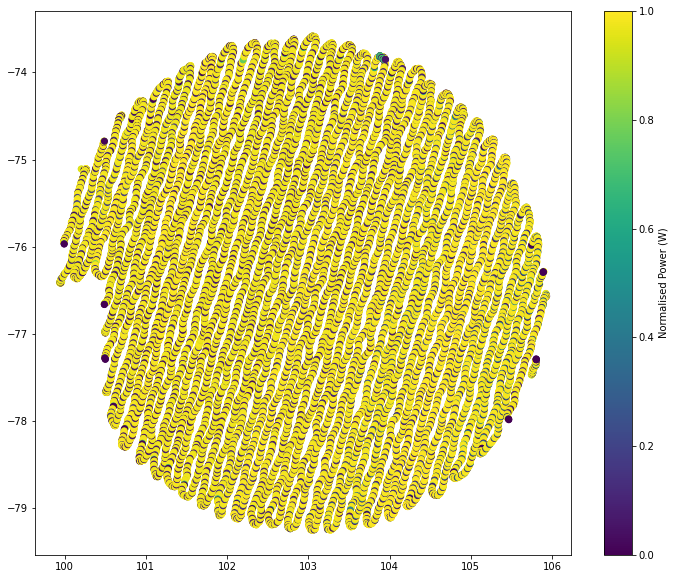

In [106]:
#Plot the speed of the laser
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(x_pos[1:36500], y_pos[1:36500], c=power[1:36500])
cbar = plt.colorbar()
cbar.ax.set_ylabel('Normalised Power (W)')

# Rate of change of Pixel intensity for raw frames

In [53]:
pix1 = 'C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/roco_pixelintensity_Camera1_rot110.mat'
pix2 = 'C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/roco_pixelintensity_Camera2_rot110.mat'

In [55]:
pix = []
with h5py.File(pix1, 'r') as h:
    for i in list(h.keys())[0:len(x_pos)]:
        val = h[i][:]
        pix.append(val)
        
pix = np.array(pix)
pix = np.reshape(pix, [len(x_pos),])
print(pix.shape)

(49400,)


Text(0.5, 1.0, 'Camera 1 raw frames')

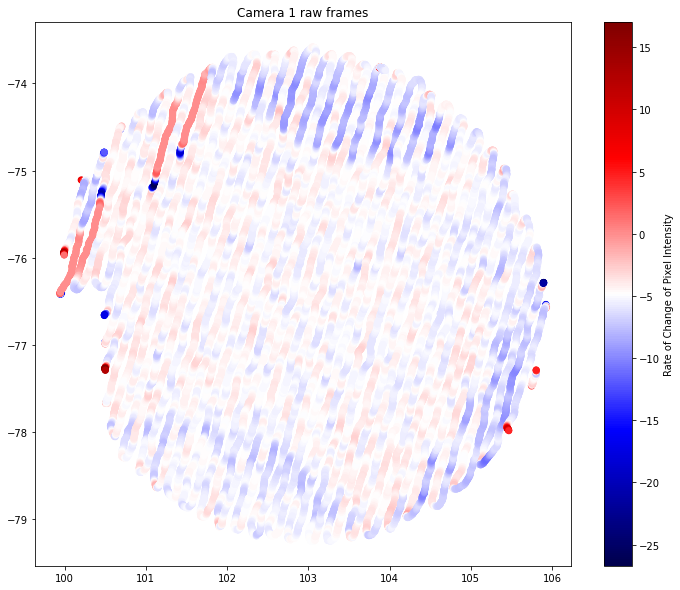

In [64]:
plt.subplots(figsize=(12,10))

from scipy.signal import savgol_filter
pix = savgol_filter(pix, 25, 2, mode='nearest')

plt.scatter(x_pos[1:36500], y_pos[1:36500], c=pix[1:36500], cmap='seismic')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Rate of Change of Pixel Intensity')
plt.title('Camera 1 raw frames')

In [65]:
pixc2 = []
with h5py.File(pix2, 'r') as h:
    for i in list(h.keys())[0:len(x_pos)]:
        val = h[i][:]
        pixc2.append(val)
        
pixc2 = np.array(pixc2)
pixc2 = np.reshape(pixc2, [len(x_pos),])
print(pixc2.shape)

(49400,)


Text(0.5, 1.0, 'Camera 2 raw frames')

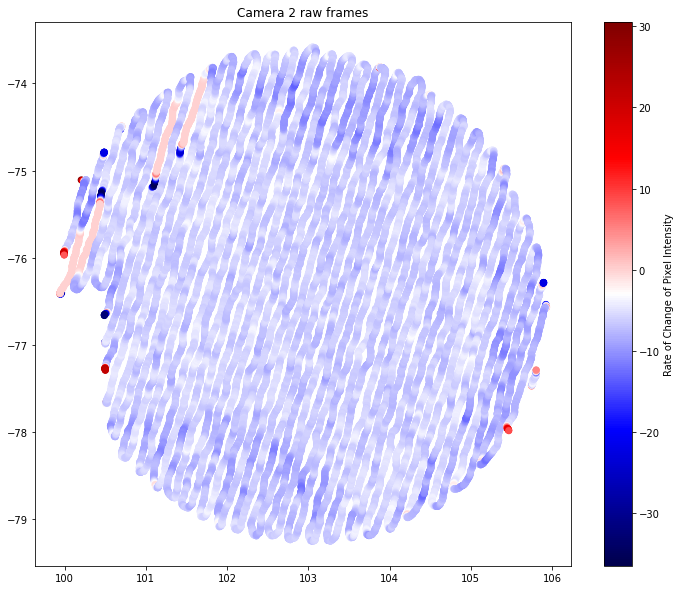

In [66]:
plt.subplots(figsize=(12,10))

from scipy.signal import savgol_filter
pixc2 = savgol_filter(pixc2, 25, 2, mode='nearest')

plt.scatter(x_pos[1:36500], y_pos[1:36500], c=pixc2[1:36500], cmap='seismic')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Rate of Change of Pixel Intensity')
plt.title('Camera 2 raw frames')

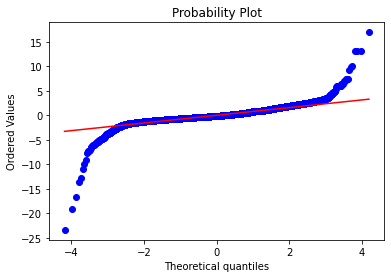

In [80]:
#Verify that it is not a normal distribution
#normalise
z = st.zscore(cr)
# sm.qqplot(z, line='45')
st.probplot(z[1:], plot=plt)
plt.show()

In [166]:
mean = np.mean(cr)
median = np.median(cr)
std = np.std(cr)
print(mean)
print(median)

-3.0128166659537654
-3.4246965561658596


Upper Bound: 0.12675009466784637
Lower Bound: -6.152383426575377


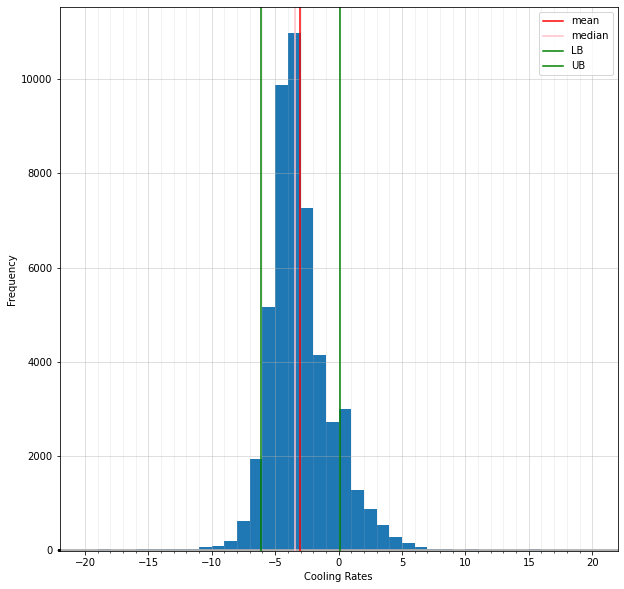

In [167]:
'''
Plot a histogram for cooling rates
'''
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(cr[1:], bins=40, range=[-20,20])

major_ticks = np.arange(-20, 20, 5)
minor_ticks = np.arange(-20, 20, 1)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)

plt.axvline(x=mean, color='red', label='mean')
plt.axvline(x=median, color='pink', label='median')
plt.axvline(x=mean-std, color='green', label='LB')
plt.axvline(x=mean+std, color='green', label='UB')

plt.legend()
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.set_xlabel('Cooling Rates')
ax.set_ylabel('Frequency')

print('Upper Bound:', mean+std)
print('Lower Bound:', mean-std)

In [26]:
st.norm.interval(confidence=0.99,
                 loc=np.mean(cr),
                 scale=st.sem(cr))

(-3.0492021136785947, -2.976431218228936)

In [30]:
# create 90% confidence interval
st.t.interval(confidence=0.90, df=len(cr)-1,
              loc=np.mean(cr),
              scale=st.sem(cr))

(-3.036051846153117, -2.9895814857544143)

In [35]:
def mean_confidence_interval(data, confidence=0.99):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

m, lb, ub = mean_confidence_interval(cr)
print(m, lb, ub)

-3.0128166659537654 -3.049203519624245 -2.976429812283286


Text(0.5, 0, 'Frame Number')

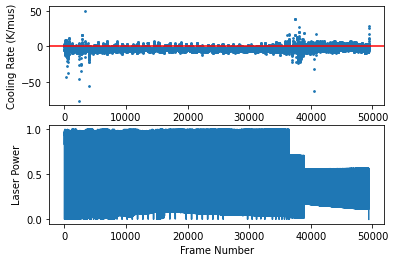

In [9]:
'''
Plot Cooling Rate and Power
'''
fig, ax = plt.subplots(2)
ax[0].scatter(x[1:len(x_pos)],cr[1:len(x_pos)], s=3)
ax[0].axhline(y=0, color='r')
# ax[0].set_xlabel('Frame Number')
ax[0].set_ylabel('Cooling Rate (K/mus)')

ax[1].plot(x[1:len(x_pos)], power[1:len(x_pos)])
ax[1].set_ylabel('Laser Power')
ax[1].set_xlabel('Frame Number')


In [17]:
#Bootstrapping

from scipy.stats import bootstrap

cr = (cr,)

In [19]:
#calculate 99% bootstrapped confidence interval for mean
bootstrap_ci = bootstrap(cr, np.mean, confidence_level=0.99,
                         random_state=1, method='percentile')

#view 99% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=-3.047340524971066, high=-2.9744298185548224)


Text(0, 0.5, 'frequency')

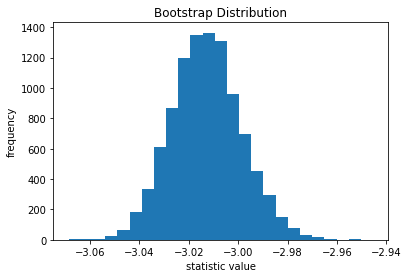

In [12]:
from scipy.stats import norm
fig, ax = plt.subplots()

ax.hist(bootstrap_ci.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')


In [34]:
crpos = []
for i in cr:
    if i<0:
        crpos.append(i)
        
crpos = np.array(crpos)
print(crpos.shape)
crpos = (crpos,)

(43151,)


In [35]:
#calculate 99% bootstrapped confidence interval for mean
bootstrap_cipos = bootstrap(crpos, np.mean, confidence_level=0.99,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_cipos.confidence_interval)

ConfidenceInterval(low=-3.047340524971066, high=-2.9744298185548224)


Text(0, 0.5, 'frequency')

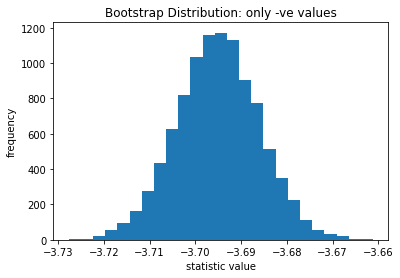

In [36]:
fig, ax = plt.subplots()

ax.hist(bootstrap_cipos.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution: only -ve values')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')

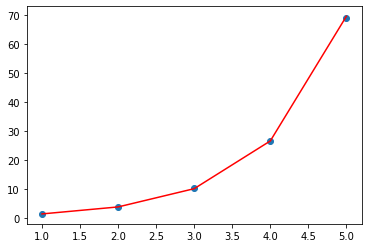

In [111]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([1.5, 3.8, 10.4, 26.7, 68.9])

def exponential_func(x, a, b):
    return a * np.exp(b * x)
    
popt, pcov = np.polyfit(x, np.log(y), 1)
a = np.exp(pcov)
b = popt

plt.scatter(x, y)
plt.plot(x, exponential_func(x, a, b), 'r-')
plt.show()

In [3]:
#Read cooling rate .mat file
f = 'C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/Temperature Gradient_centroids_added.mat'

In [19]:
cr = []
with h5py.File(f, 'r') as h:
    for i in list(h.keys())[0:len(x_pos)]:
        val = h[i][:]
        cr.append(val)
        
cr = np.array(cr)
cr = np.reshape(cr, [len(x_pos),])
x = np.linspace(0,len(x_pos),len(x_pos))
print(cr.shape)

(49400,)


In [20]:
#Cooling rate map
import matplotlib as mpl
import matplotlib.colors

cr_new = []
x = []
y = []
crAnomaly = []
xAnomaly = []
yAnomaly = []

for i in range(0, 36500):
    if cr[i] < -20 or cr[i] > 20:
        crAnomaly.append(cr[i])
        xAnomaly.append(x_pos[i])
        yAnomaly.append(y_pos[i])
    else:
        cr_new.append(cr[i])
        x.append(x_pos[i])
        y.append(y_pos[i])

cr_new = np.array(cr_new)

crPositive = []
xPositive = []
yPositive = []
powerOff = []
xPower = []
yPower = []

for i in range(0,36500):
    if cr[i] > 0:
        crPositive.append(cr[i])
        xPositive.append(x_pos[i])
        yPositive.append(y_pos[i])
    if power[i] < 0.8:
        powerOff.append(power[i])
        xPower.append(x_pos[i])
        yPower.append(y_pos[i])

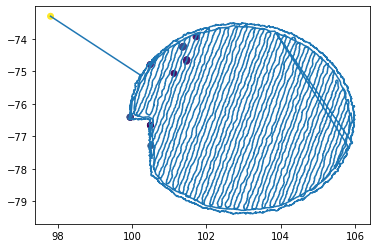

In [25]:
plt.scatter(xAnomaly, yAnomaly, c=crAnomaly, s=35)
plt.plot(x_pos, y_pos)

Text(0, 0.5, 'y (mm)')

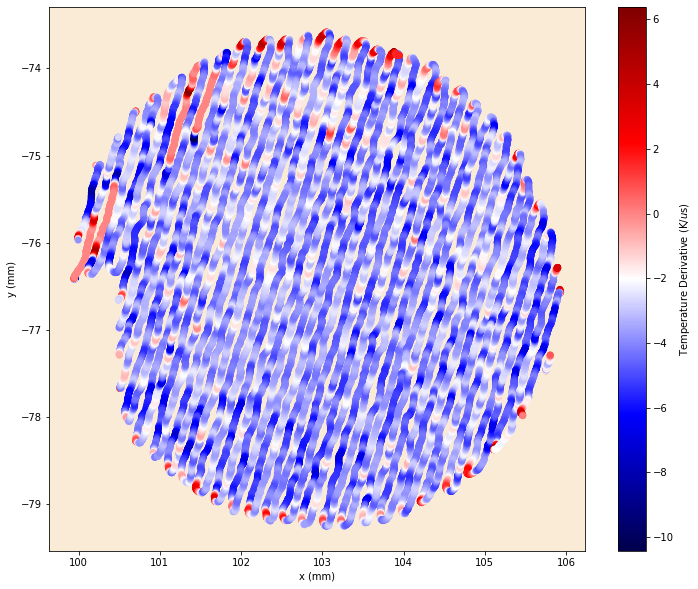

In [32]:
fig, ax = plt.subplots(figsize=(12,10))

from scipy.signal import savgol_filter
cr_new = savgol_filter(cr_new, 15, 2, mode='nearest')
plt.scatter(x[1:], y[1:], c=cr_new[1:], cmap='seismic', s=35)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Temperature Derivative (K/$u$s)')
ax.set_facecolor('antiquewhite')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
# plt.title('Cooling Rate Map - skipped cooling rates <-20 and >20 for clearer visualisation')
# fig.savefig('temp_gradient_lbl.png')

# Corner Detection

In [4]:
#Edge detection
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("build plate scatter.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

img_canny = cv2.Canny(blurred,100,200)

#sobel
img_sobelx = cv2.Sobel(blurred,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(blurred,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely

#previtt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(blurred, -1, kernelx)
img_prewitty = cv2.filter2D(blurred, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

cv2.imwrite("img_sobelx.jpg", img_sobelx)

True

(558, 683, 3)


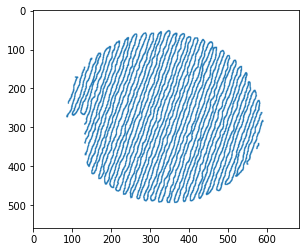

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# %matplotlib inline

# Read in the image
image = cv2.imread("buildplate_scatter.png")

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)
print(image_copy.shape)

(558, 683)


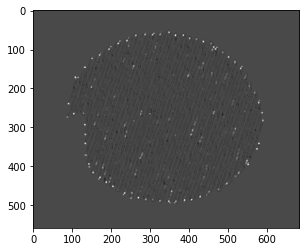

In [54]:

# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 7, 0.05)
print(dst.shape)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

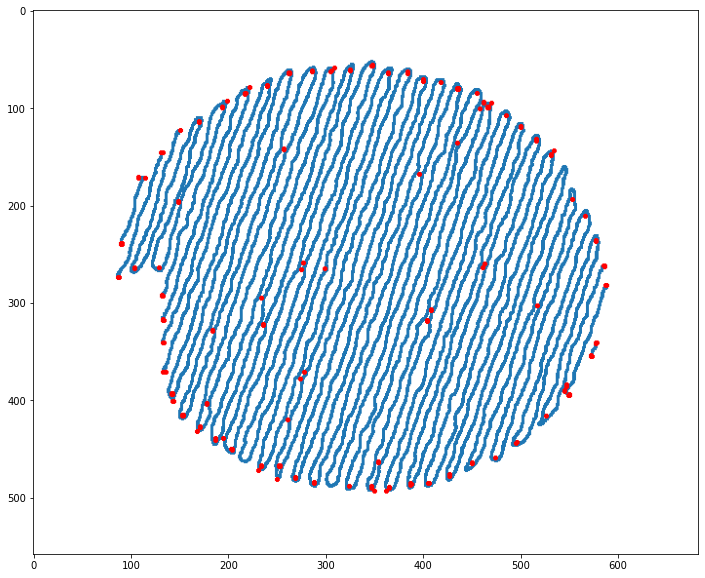

In [56]:
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller and see what happens
# Used 0.182 for the line plot
# Used about 0.35 for scatter plot (original dataset)
# 0.20 for L156 
thresh = 0.35*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
corners = []
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (255,0,0), 1)
            corners.append([i,j])

# print(corners)
# corners = np.array(corners)
# print(corners.shape)

fig, ax = plt.subplots(figsize=(12,10))
# circle=plt.Circle((350,280),200, color='r')
circle=plt.Circle((200,200),100, color='r')
# ax.add_patch(circle)
plt.imshow(corner_image)

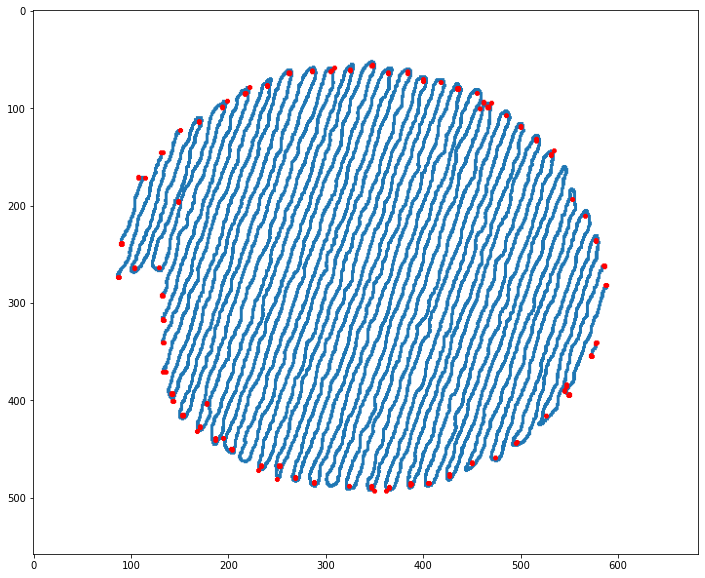

In [59]:
# Need a script to only keep one point from one corner detected
# Need to make sure that the only the corners with more than x number of points are vali
x_centre = 350
y_centre = 280
radius = 190

# x_centre = 200
# y_centre = 200
# radius = 100

res = []
for i in corners:
    temp =np.sqrt((i[0] - x_centre)**2 + (i[1] - y_centre)**2)
    if temp >= radius:
        res.append(i)

corner_image = np.copy(image_copy)

for i in res:
    cv2.circle(corner_image, i, 1, (255,0,0), 1)

fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(corner_image)

[[196.14285714  96.71428571]
 [324.         488.        ]
 [553.         194.        ]
 [134.5        371.        ]
 [364.          64.5       ]
 [547.35714286 390.        ]
 [ 90.5        239.5       ]
 [464.34782609  97.60869565]
 [232.71428571 469.42857143]
 [405.5        485.        ]
 [286.          62.5       ]
 [111.         171.71428571]
 [169.71428571 429.42857143]
 [585.6        262.4       ]
 [495.5        443.5       ]
 [132.4        292.6       ]
 [532.28571429 146.57142857]
 [577.4        341.4       ]
 [363.71428571 491.        ]
 [435.5         80.5       ]
 [219.125       83.        ]
 [450.         464.5       ]
 [149.         196.5       ]
 [306.86956522  61.13043478]
 [151.         123.        ]
 [269.         479.5       ]
 [104.         264.5       ]
 [142.92857143 396.71428571]
 [400.          72.        ]
 [190.         439.625     ]
 [516.         133.        ]
 [133.5        341.        ]
 [526.         416.        ]
 [262.5         64.5       ]
 [132.        

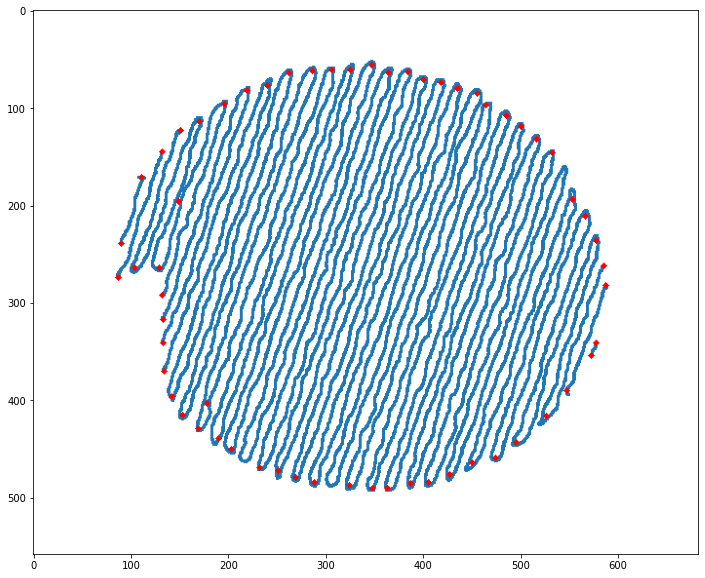

In [61]:
#Kmeans to keep one point at each cluster
#number of clusters = 60 for original dataset
#clusters = 47 for L156

from sklearn.cluster import KMeans

pts = np.array(res)
kmeans = KMeans(n_clusters=60, random_state=0).fit(pts)
new_pts = kmeans.cluster_centers_
print(new_pts)

corner_image = np.copy(image_copy)
for i in new_pts:
    cv2.circle(corner_image,(int(i[0]), int(i[1])), 1, (255,0,0), 3)

fig, ax = plt.subplots(figsize=(12,10))
plt.imshow(corner_image)
# plt.plot(149, 196.5, marker="o", markersize=10, markerfacecolor="green")
# plt.plot(178, 403.5 , marker="o", markersize=10, markerfacecolor="green")

# Build Up (Dimitrios Data)

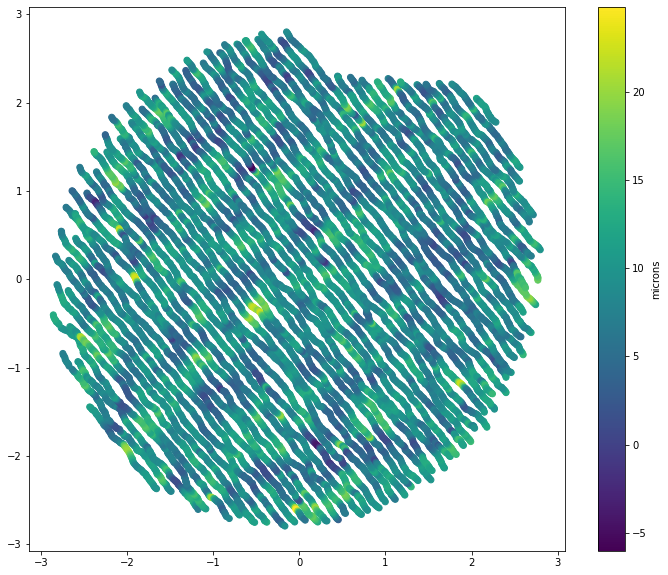

In [3]:
#Dimitrios' data
pores = pd.read_csv('C:/Users/cyiwe/OneDrive - Imperial College London/ME4/FYP/fyp/layer8/layer7finaldata_PORES_STRAIGHT_NEWMETRICS.csv')

x = np.array(pores['x'][:])
y = np.array(pores['y'][:])
buildup = np.array(pores['buildup'][:])

fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(x,y, c=buildup)
cbar = plt.colorbar()
cbar.ax.set_ylabel('microns')
# plt.savefig('layer8_buildup.png')
# plt.title('Layer 7 Build Up')
plt.show()